In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("C:\\Users\\Nguyen_Thanh_Vinh\\Downloads\\PREPARE DATA.xlsx")
df

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,H,I,J,K,DOB,gender,address,Website,job,industry
0,0000000014,25,1,90000,0,2,0,0,0,0,...,0,0,0,0,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,1,2,180000,2,0,0,2,2,0,...,0,0,0,0,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,9,1,90000,2,0,0,0,2,0,...,0,0,0,0,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics
3,0000000081,26,2,180000,0,4,0,0,0,0,...,0,0,0,0,36472,Nam,truong chinh,KH0104|0293,student,economics
4,0000000098,6,2,180000,0,2,0,2,2,0,...,2,0,0,0,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,KH9855766,0,3,270000,2,3,0,0,2,0,...,0,2,3,0,34885,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",NaN,specialist,finance
4475,KH9958204,6,1,135000,0,0,0,3,0,0,...,0,0,0,3,36892,Nữ,"Phước Mỹ, ĐN",NaN,teenager,NaN
4476,WEBS00000043900,22,2,180000,0,0,0,2,0,0,...,1,0,0,0,32311,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction
4477,WEBS00000044909,1,1,180000,0,4,0,0,0,0,...,0,0,0,0,35316,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance


In [3]:
columns_to_drop = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                   'Sáng', 'Trưa', 'Chiều', 'Tối', 'Khuya']

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [4]:
df.isnull().sum()

customerid             0
Recency                0
Frequency              0
Monetary               0
action                 0
action-adventure       0
animation              0
comedy                 0
crime                  0
drama                  0
family                 0
fantasy                0
horror                 0
melodrama              0
mystery                0
romance                0
sci-fi                 0
thriller               0
DOB                    1
gender                 1
address                2
Website              537
job                    1
industry            1123
dtype: int64

In [5]:
# Điền giá trị phổ biến nhất cho DOB, gender, job
df['DOB'].fillna(df['DOB'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)

# Điền industry bằng chuỗi 'Nan'
df['industry'].fillna('Nan', inplace=True)

# Xoá cột Website và address
df.drop(columns=['Website', 'address'], inplace=True)

C:\Users\Nguyen_Thanh_Vinh\AppData\Local\Temp\ipykernel_4356\2213359453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DOB'].fillna(df['DOB'].mode()[0], inplace=True)
C:\Users\Nguyen_Thanh_Vinh\AppData\Local\Temp\ipykernel_4356\2213359453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [6]:
df.isnull().sum()

customerid          0
Recency             0
Frequency           0
Monetary            0
action              0
action-adventure    0
animation           0
comedy              0
crime               0
drama               0
family              0
fantasy             0
horror              0
melodrama           0
mystery             0
romance             0
sci-fi              0
thriller            0
DOB                 0
gender              0
job                 0
industry            0
dtype: int64

In [7]:
def convert_excel_date(x):
    try:
        # Nếu là số -> chuyển từ Excel serial
        if isinstance(x, (int, float)):
            return pd.to_datetime(x, origin='1899-12-30', unit='D')
        # Nếu là chuỗi ngày hợp lệ
        else:
            return pd.to_datetime(x, errors='coerce')
    except:
        return pd.NaT  # Nếu không chuyển được thì gán NaT (null)

df['DOB'] = df['DOB'].apply(convert_excel_date)

In [8]:
# Sau khi chuyển đổi DOB, có một số giá trị bị lỗi vì hông hợp lệ hoặc bị định dạng sai
invalid_dob = df[df['DOB'].isna()]
invalid_dob

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,horror,melodrama,mystery,romance,sci-fi,thriller,DOB,gender,job,industry
1177,0001013549,12,1,315000,0,7,0,7,0,0,...,0,0,7,0,7,0,NaT,Nam,teenager,Nan
1563,0001077023,20,1,585000,0,0,0,0,0,0,...,13,0,13,0,0,13,NaT,Nam,teenager,Nan
2207,0001120656,5,6,540000,0,9,3,6,0,0,...,3,0,0,0,9,0,NaT,Nam,teenager,Nan


In [9]:
# Tìm giá trị xuất hiện nhiều nhất (mode), bỏ qua NaT
most_common_dob = df['DOB'].mode()[0]

# Thay thế NaT bằng giá trị xuất hiện nhiều nhất
df['DOB'].fillna(most_common_dob, inplace=True)

C:\Users\Nguyen_Thanh_Vinh\AppData\Local\Temp\ipykernel_4356\2046524930.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DOB'].fillna(most_common_dob, inplace=True)


In [10]:
df.columns

Index(['customerid', 'Recency', 'Frequency', 'Monetary', 'action',
       'action-adventure', 'animation', 'comedy', 'crime', 'drama', 'family',
       'fantasy', 'horror', 'melodrama', 'mystery', 'romance', 'sci-fi',
       'thriller', 'DOB', 'gender', 'job', 'industry'],
      dtype='object')

In [11]:
# Chuyển DOB thành tuổi
df['age'] = (pd.Timestamp('today') - df['DOB']).dt.days // 365

# Tính mode (giá trị xuất hiện nhiều nhất)
age_mode = df['age'].mode()[0]

# Thay các giá trị tuổi <= 0 bằng mode
df.loc[df['age'] <= 0, 'age'] = age_mode

# Loại bỏ cột DOB nếu chưa làm
df_roof = df.copy()
df.drop(columns=['DOB'], inplace=True, errors='ignore')

In [12]:
df

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,horror,melodrama,mystery,romance,sci-fi,thriller,gender,job,industry,age
0,0000000014,25,1,90000,0,2,0,0,0,0,...,0,0,0,0,2,0,Nữ,student,computer,26
1,0000000034,1,2,180000,2,0,0,2,2,0,...,2,0,0,0,0,2,Nam,student,health service,27
2,0000000051,9,1,90000,2,0,0,0,2,0,...,0,0,0,0,0,2,Nam,blue collar,economics,31
3,0000000081,26,2,180000,0,4,0,0,0,0,...,0,0,0,0,4,0,Nam,student,economics,25
4,0000000098,6,2,180000,0,2,0,2,2,0,...,0,0,0,0,2,2,Nam,blue collar,health service,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,KH9855766,0,3,270000,2,3,0,0,2,0,...,0,0,0,0,0,2,Nữ,specialist,finance,29
4475,KH9958204,6,1,135000,0,0,0,3,0,0,...,3,0,0,0,0,0,Nữ,teenager,Nan,24
4476,WEBS00000043900,22,2,180000,0,0,0,2,0,0,...,1,0,1,2,0,1,Nữ,specialist,construction,36
4477,WEBS00000044909,1,1,180000,0,4,0,0,0,0,...,0,0,0,0,0,0,Nữ,blue collar,finance,28


In [13]:
# One-Hot Encoding cho cột 'job' và 'industry'
df = pd.get_dummies(df, columns=['job', 'industry'], drop_first=True)

# Mã hóa cột phân loại 'gender' bằng cat.codes
df['gender'] = df['gender'].astype('category').cat.codes

In [14]:
from sklearn.preprocessing import StandardScaler

# Các cột số cần chuẩn hóa
numeric_columns = ['Recency', 'Frequency', 'Monetary', 'age'] + ['action', 'action-adventure', 'animation', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'horror', 'melodrama', 'mystery', 'romance', 'sci-fi', 'thriller']

# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [15]:
df

,customerid,Recency,Frequency,Monetary,action,action-adventure,animation,comedy,crime,drama,...,job_white collar,industry_computer,industry_construction,industry_economics,industry_education,industry_engineering,industry_finance,industry_government agent,industry_health service,industry_social service
0,0000000014,1.241949,-0.030673,-0.032421,-0.046653,-0.018313,-0.03325,-0.041764,-0.045957,-0.04671,...,False,True,False,False,False,False,False,False,False,False
1,0000000034,-1.417239,-0.017154,-0.022240,0.086570,-0.044919,-0.03325,-0.006913,0.061870,-0.04671,...,False,False,False,False,False,False,False,False,True,False
2,0000000051,-0.530843,-0.030673,-0.032421,0.086570,-0.044919,-0.03325,-0.041764,0.061870,-0.04671,...,False,False,False,True,False,False,False,False,False,False
3,0000000081,1.352749,-0.017154,-0.022240,-0.046653,0.008292,-0.03325,-0.041764,-0.045957,-0.04671,...,False,False,False,True,False,False,False,False,False,False
4,0000000098,-0.863242,-0.017154,-0.022240,-0.046653,-0.018313,-0.03325,-0.006913,0.061870,-0.04671,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,KH9855766,-1.528039,-0.003634,-0.012059,0.086570,-0.005010,-0.03325,-0.041764,0.061870,-0.04671,...,False,False,False,False,False,False,True,False,False,False
4475,KH9958204,-0.863242,-0.030673,-0.027331,-0.046653,-0.044919,-0.03325,0.010512,-0.045957,-0.04671,...,False,False,False,False,False,False,False,False,False,False
4476,WEBS00000043900,0.909551,-0.017154,-0.022240,-0.046653,-0.044919,-0.03325,-0.006913,-0.045957,-0.04671,...,False,False,True,False,False,False,False,False,False,False
4477,WEBS00000044909,-1.417239,-0.030673,-0.022240,-0.046653,0.008292,-0.03325,-0.041764,-0.045957,-0.04671,...,False,False,False,False,False,False,True,False,False,False


### __KMEANS__

In [16]:
from sklearn.cluster import KMeans

# Bỏ cột 'customerid' vì đó là chỉ mục và không tham gia vào quá trình phân cụm
X = df.drop(columns='customerid')

# Bước 1: Áp dụng K-Means với số cụm mong muốn (ví dụ 4 cụm)
kmeans = KMeans(n_clusters=4, random_state=42)

# Dự đoán nhãn phân cụm và gán vào cột 'cluster' trong df
df['cluster'] = kmeans.fit_predict(X)

# Xem kết quả phân cụm
print(df[['customerid', 'cluster']].head())

   customerid  cluster
0  0000000014        0
1  0000000034        3
2  0000000051        3
3  0000000081        0
4  0000000098        3


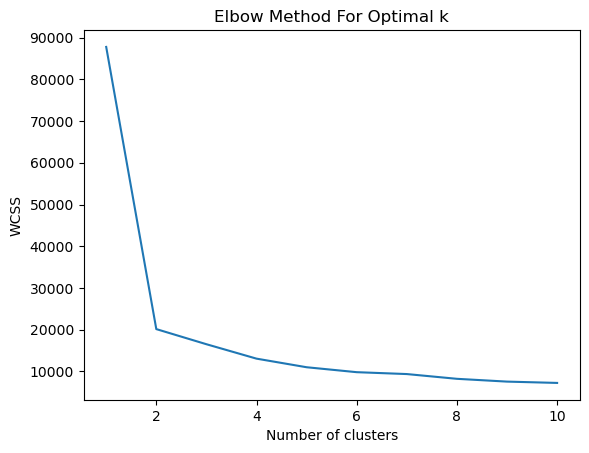

In [17]:
import matplotlib.pyplot as plt

# Tính toán WCSS (Within-cluster sum of squares) cho nhiều giá trị n_clusters
wcss = []
for i in range(1, 11):  # Kiểm tra từ 1 đến 10 cụm
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
df_segmentation = pd.merge(df_roof, df[['customerid', 'cluster']], on="customerid", how="left")

In [19]:
df_segmentation.to_excel("C:\\Users\\Nguyen_Thanh_Vinh\\Downloads\\SEGMENTATION.xlsx", index = None)

In [20]:
# Lặp qua từng giá trị của cluster
for cluster_label in sorted(df_segmentation['cluster'].unique()):
    print(f"\n📦=== THỐNG KÊ CHO CLUSTER {cluster_label} ===📦")
    
    # Lọc dữ liệu của cluster hiện tại
    cluster_data = df_segmentation[df_segmentation['cluster'] == cluster_label]
    
    # Số lượng phần tử trong cluster
    print(f"🔢 Số lượng khách hàng trong cụm: {len(cluster_data)}")
    
    # Bỏ cột không cần thiết nếu có (ví dụ customerid)
    cluster_data_numeric = cluster_data.select_dtypes(include='number').drop(columns=['customerid'], errors='ignore')
    
    # Tính các chỉ số thống kê
    summary_df = pd.DataFrame({
        'Tổng': cluster_data_numeric.sum(),
        'Trung bình': cluster_data_numeric.mean(),
        'Min': cluster_data_numeric.min(),
        'Max': cluster_data_numeric.max(),
        'Mode': cluster_data_numeric.mode().iloc[0]
    })
    
    # Hiển thị bảng thống kê
    display(summary_df)


📦=== THỐNG KÊ CHO CLUSTER 0 ===📦
🔢 Số lượng khách hàng trong cụm: 2229


,Tổng,Trung bình,Min,Max,Mode
Recency,48259,21.650516,11,30,26
Frequency,3094,1.388066,1,18,1
Monetary,356390000,159887.842082,45000,4530000,90000
action,341,0.152983,0,12,0
action-adventure,3725,1.671153,0,57,0
animation,0,0.000000,0,0,0
comedy,1441,0.646478,0,27,0
crime,418,0.187528,0,27,0
drama,262,0.117541,0,12,0
family,634,0.284432,0,13,0



📦=== THỐNG KÊ CHO CLUSTER 1 ===📦
🔢 Số lượng khách hàng trong cụm: 1


,Tổng,Trung bình,Min,Max,Mode
Recency,0,0.0,0,0,0
Frequency,4043,4043.0,4043,4043,4043
Monetary,490635000,490635000.0,490635000,490635000,490635000
action,885,885.0,885,885,885
action-adventure,4007,4007.0,4007,4007,4007
animation,244,244.0,244,244,244
comedy,2911,2911.0,2911,2911,2911
crime,1074,1074.0,1074,1074,1074
drama,401,401.0,401,401,401
family,1694,1694.0,1694,1694,1694



📦=== THỐNG KÊ CHO CLUSTER 2 ===📦
🔢 Số lượng khách hàng trong cụm: 1


,Tổng,Trung bình,Min,Max,Mode
Recency,0,0.0,0,0,0
Frequency,2854,2854.0,2854,2854,2854
Monetary,330290000,330290000.0,330290000,330290000,330290000
action,469,469.0,469,469,469
action-adventure,3037,3037.0,3037,3037,3037
animation,361,361.0,361,361,361
comedy,2496,2496.0,2496,2496,2496
crime,616,616.0,616,616,616
drama,184,184.0,184,184,184
family,1437,1437.0,1437,1437,1437



📦=== THỐNG KÊ CHO CLUSTER 3 ===📦
🔢 Số lượng khách hàng trong cụm: 2248


,Tổng,Trung bình,Min,Max,Mode
Recency,13511,6.010231,0,20,0
Frequency,4650,2.068505,1,206,1
Monetary,509500000,226645.907473,45000,23310000,90000
action,1442,0.641459,0,40,0
action-adventure,4355,1.937278,0,201,0
animation,370,0.164591,0,33,0
comedy,3887,1.729093,0,221,0
crime,1710,0.760676,0,42,0
drama,541,0.240658,0,16,0
family,2568,1.142349,0,120,0


### __DBSCAN__

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Bỏ cột 'customerid' vì không tham gia phân cụm
df_dbscan = df.drop(columns=['customerid', 'cluster'])

# Áp dụng DBSCAN
dbscan = DBSCAN(eps=0.9000000000000001, min_samples=6)  # eps và min_samples có thể tinh chỉnh
clusters = dbscan.fit_predict(df_dbscan)

# Gán kết quả phân cụm vào DataFrame
df['cluster'] = clusters

In [33]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

best_score = -1
best_params = {}
for eps in np.arange(0.3, 1.5, 0.1):
    for min_samples in range(3, 10):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_dbscan)

        # Chỉ tính nếu có ít nhất 2 cụm (không tính outlier là -1)
        if len(set(labels)) > 1 and len(set(labels)) - (1 if -1 in labels else 0) >= 2:
            try:
                score = silhouette_score(df_dbscan, labels)
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
            except:
                continue

print(f"Best params: {best_params}, Silhouette Score: {best_score:.4f}")

Best params: {'eps': 0.9000000000000001, 'min_samples': 6}, Silhouette Score: 0.1829


In [35]:
df_segmentation = pd.merge(df_roof, df[['customerid', 'cluster']], on="customerid", how="left")

In [36]:
# Lặp qua từng giá trị của cluster
for cluster_label in sorted(df_segmentation['cluster'].unique()):
    print(f"\n📦=== THỐNG KÊ CHO CLUSTER {cluster_label} ===📦")
    
    # Lọc dữ liệu của cluster hiện tại
    cluster_data = df_segmentation[df_segmentation['cluster'] == cluster_label]
    
    # Số lượng phần tử trong cluster
    print(f"🔢 Số lượng khách hàng trong cụm: {len(cluster_data)}")
    
    # Bỏ cột không cần thiết nếu có (ví dụ customerid)
    cluster_data_numeric = cluster_data.select_dtypes(include='number').drop(columns=['customerid'], errors='ignore')
    
    # Tính các chỉ số thống kê
    summary_df = pd.DataFrame({
        'Tổng': cluster_data_numeric.sum(),
        'Trung bình': cluster_data_numeric.mean(),
        'Min': cluster_data_numeric.min(),
        'Max': cluster_data_numeric.max(),
        'Mode': cluster_data_numeric.mode().iloc[0]
    })
    
    # Hiển thị bảng thống kê
    display(summary_df)


📦=== THỐNG KÊ CHO CLUSTER -1 ===📦
🔢 Số lượng khách hàng trong cụm: 275


,Tổng,Trung bình,Min,Max,Mode
Recency,3294,1.197818e+01,0,30,12
Frequency,7665,2.787273e+01,1,4043,1
Monetary,923990000,3.359964e+06,45000,490635000,90000
action,1603,5.829091e+00,0,885,0
action-adventure,8018,2.915636e+01,0,4007,0
animation,706,2.567273e+00,0,361,0
comedy,6120,2.225455e+01,0,2911,0
crime,2014,7.323636e+00,0,1074,0
drama,825,3.000000e+00,0,401,0
family,3612,1.313455e+01,0,1694,0



📦=== THỐNG KÊ CHO CLUSTER 0 ===📦
🔢 Số lượng khách hàng trong cụm: 86


,Tổng,Trung bình,Min,Max,Mode
Recency,1281,14.895349,0,30,1.0
Frequency,155,1.802326,1,6,1.0
Monetary,16665000,193779.069767,45000,855000,90000.0
action,23,0.267442,0,4,0.0
action-adventure,183,2.127907,0,13,0.0
animation,6,0.069767,0,4,0.0
comedy,106,1.232558,0,9,0.0
crime,25,0.290698,0,4,0.0
drama,8,0.093023,0,2,0.0
family,61,0.709302,0,7,0.0



📦=== THỐNG KÊ CHO CLUSTER 1 ===📦
🔢 Số lượng khách hàng trong cụm: 67


,Tổng,Trung bình,Min,Max,Mode
Recency,996,14.865672,0,30,20
Frequency,89,1.328358,1,5,1
Monetary,9960000,148656.716418,45000,450000,90000
action,20,0.298507,0,4,0
action-adventure,72,1.074627,0,6,0
animation,2,0.029851,0,2,0
comedy,50,0.746269,0,8,0
crime,22,0.328358,0,4,0
drama,8,0.119403,0,5,0
family,14,0.208955,0,2,0



📦=== THỐNG KÊ CHO CLUSTER 2 ===📦
🔢 Số lượng khách hàng trong cụm: 43


,Tổng,Trung bình,Min,Max,Mode
Recency,671,15.604651,1,29,26
Frequency,65,1.511628,1,5,1
Monetary,6660000,154883.720930,45000,360000,90000
action,24,0.558140,0,4,0
action-adventure,65,1.511628,0,4,2
animation,0,0.000000,0,0,0
comedy,41,0.953488,0,6,0
crime,29,0.674419,0,6,0
drama,6,0.139535,0,3,0
family,22,0.511628,0,4,0



📦=== THỐNG KÊ CHO CLUSTER 3 ===📦
🔢 Số lượng khách hàng trong cụm: 50


,Tổng,Trung bình,Min,Max,Mode
Recency,655,13.10,0,29,0
Frequency,87,1.74,1,6,1
Monetary,8685000,173700.00,45000,540000,90000
action,20,0.40,0,3,0
action-adventure,90,1.80,0,7,0
animation,5,0.10,0,3,0
comedy,52,1.04,0,7,0
crime,25,0.50,0,3,0
drama,4,0.08,0,2,0
family,31,0.62,0,5,0



📦=== THỐNG KÊ CHO CLUSTER 4 ===📦
🔢 Số lượng khách hàng trong cụm: 40


,Tổng,Trung bình,Min,Max,Mode
Recency,605,15.125,0,29,5
Frequency,63,1.575,1,4,1
Monetary,6555000,163875.000,45000,810000,90000
action,18,0.450,0,6,0
action-adventure,85,2.125,0,12,2
animation,3,0.075,0,3,0
comedy,28,0.700,0,4,0
crime,20,0.500,0,6,0
drama,0,0.000,0,0,0
family,32,0.800,0,6,0



📦=== THỐNG KÊ CHO CLUSTER 5 ===📦
🔢 Số lượng khách hàng trong cụm: 62


,Tổng,Trung bình,Min,Max,Mode
Recency,913,14.725806,0,29,29
Frequency,109,1.758065,1,10,1
Monetary,10980000,177096.774194,90000,1035000,90000
action,35,0.564516,0,4,0
action-adventure,112,1.806452,0,8,2
animation,9,0.145161,0,4,0
comedy,71,1.145161,0,15,0
crime,40,0.645161,0,4,0
drama,12,0.193548,0,5,0
family,42,0.677419,0,8,0



📦=== THỐNG KÊ CHO CLUSTER 6 ===📦
🔢 Số lượng khách hàng trong cụm: 46


,Tổng,Trung bình,Min,Max,Mode
Recency,598,13.000000,0,30,5
Frequency,91,1.978261,1,7,1
Monetary,10140000,220434.782609,45000,1200000,90000
action,15,0.326087,0,3,0
action-adventure,117,2.543478,0,18,0
animation,0,0.000000,0,0,0
comedy,67,1.456522,0,8,0
crime,19,0.413043,0,3,0
drama,8,0.173913,0,2,0
family,36,0.782609,0,10,0



📦=== THỐNG KÊ CHO CLUSTER 7 ===📦
🔢 Số lượng khách hàng trong cụm: 42


,Tổng,Trung bình,Min,Max,Mode
Recency,581,13.833333,0,30,5.0
Frequency,55,1.309524,1,3,1.0
Monetary,5955000,141785.714286,45000,405000,90000.0
action,22,0.523810,0,7,0.0
action-adventure,55,1.309524,0,9,0.0
animation,0,0.000000,0,0,0.0
comedy,23,0.547619,0,3,0.0
crime,25,0.595238,0,7,0.0
drama,2,0.047619,0,2,0.0
family,20,0.476190,0,4,0.0



📦=== THỐNG KÊ CHO CLUSTER 8 ===📦
🔢 Số lượng khách hàng trong cụm: 29


,Tổng,Trung bình,Min,Max,Mode
Recency,398,13.724138,5,26,6
Frequency,39,1.344828,1,4,1
Monetary,4005000,138103.448276,90000,450000,90000
action,16,0.551724,0,4,0
action-adventure,31,1.068966,0,4,0
animation,0,0.000000,0,0,0
comedy,16,0.551724,0,5,0
crime,19,0.655172,0,4,0
drama,2,0.068966,0,2,0
family,10,0.344828,0,2,0



📦=== THỐNG KÊ CHO CLUSTER 9 ===📦
🔢 Số lượng khách hàng trong cụm: 47


,Tổng,Trung bình,Min,Max,Mode
Recency,607,12.914894,0,29,4.0
Frequency,71,1.510638,1,3,1.0
Monetary,7920000,168510.638298,45000,450000,90000.0
action,28,0.595745,0,3,0.0
action-adventure,67,1.425532,0,9,0.0
animation,2,0.042553,0,2,0.0
comedy,55,1.170213,0,9,0.0
crime,29,0.617021,0,3,0.0
drama,5,0.106383,0,4,0.0
family,28,0.595745,0,6,0.0



📦=== THỐNG KÊ CHO CLUSTER 10 ===📦
🔢 Số lượng khách hàng trong cụm: 31


,Tổng,Trung bình,Min,Max,Mode
Recency,415,13.387097,0,29,5
Frequency,49,1.580645,1,5,1
Monetary,5175000,166935.483871,90000,450000,90000
action,12,0.387097,0,4,0
action-adventure,41,1.322581,0,6,0
animation,1,0.032258,0,1,0
comedy,20,0.645161,0,4,0
crime,12,0.387097,0,4,0
drama,4,0.129032,0,2,0
family,12,0.387097,0,2,0



📦=== THỐNG KÊ CHO CLUSTER 11 ===📦
🔢 Số lượng khách hàng trong cụm: 34


,Tổng,Trung bình,Min,Max,Mode
Recency,520,15.294118,0,29,26.0
Frequency,47,1.382353,1,3,1.0
Monetary,4725000,138970.588235,45000,270000,90000.0
action,7,0.205882,0,3,0.0
action-adventure,57,1.676471,0,5,2.0
animation,2,0.058824,0,2,0.0
comedy,35,1.029412,0,6,0.0
crime,9,0.264706,0,3,0.0
drama,11,0.323529,0,4,0.0
family,26,0.764706,0,5,0.0



📦=== THỐNG KÊ CHO CLUSTER 12 ===📦
🔢 Số lượng khách hàng trong cụm: 663


,Tổng,Trung bình,Min,Max,Mode
Recency,8974,13.535445,0,29,22
Frequency,1112,1.677225,1,10,1
Monetary,135870000,204932.126697,45000,1395000,90000
action,169,0.254902,0,10,0
action-adventure,995,1.500754,0,24,0
animation,71,0.107089,0,8,0
comedy,888,1.339367,0,15,0
crime,200,0.301659,0,10,0
drama,149,0.224736,0,8,0
family,491,0.740573,0,20,0



📦=== THỐNG KÊ CHO CLUSTER 13 ===📦
🔢 Số lượng khách hàng trong cụm: 83


,Tổng,Trung bình,Min,Max,Mode
Recency,1159,13.963855,0,29,5
Frequency,129,1.554217,1,4,1
Monetary,13590000,163734.939759,45000,1395000,90000
action,23,0.277108,0,4,0
action-adventure,113,1.361446,0,6,0
animation,6,0.072289,0,4,0
comedy,71,0.855422,0,6,0
crime,26,0.313253,0,4,0
drama,5,0.060241,0,2,0
family,44,0.530120,0,6,0



📦=== THỐNG KÊ CHO CLUSTER 14 ===📦
🔢 Số lượng khách hàng trong cụm: 30


,Tổng,Trung bình,Min,Max,Mode
Recency,348,11.600000,0,29,0
Frequency,64,2.133333,1,10,1
Monetary,7555000,251833.333333,90000,1750000,90000
action,14,0.466667,0,5,0
action-adventure,77,2.566667,0,16,0
animation,0,0.000000,0,0,0
comedy,36,1.200000,0,8,0
crime,18,0.600000,0,5,0
drama,6,0.200000,0,3,0
family,21,0.700000,0,5,0



📦=== THỐNG KÊ CHO CLUSTER 15 ===📦
🔢 Số lượng khách hàng trong cụm: 21


,Tổng,Trung bình,Min,Max,Mode
Recency,311,14.809524,0,26,10.0
Frequency,33,1.571429,1,4,1.0
Monetary,3150000,150000.000000,45000,360000,90000.0
action,5,0.238095,0,2,0.0
action-adventure,27,1.285714,0,4,0.0
animation,0,0.000000,0,0,0.0
comedy,9,0.428571,0,2,0.0
crime,5,0.238095,0,2,0.0
drama,3,0.142857,0,2,0.0
family,8,0.380952,0,2,0.0



📦=== THỐNG KÊ CHO CLUSTER 16 ===📦
🔢 Số lượng khách hàng trong cụm: 22


,Tổng,Trung bình,Min,Max,Mode
Recency,241,10.954545,0,29,6.0
Frequency,45,2.045455,1,8,1.0
Monetary,5040000,229090.909091,45000,1125000,90000.0
action,13,0.590909,0,3,0.0
action-adventure,55,2.500000,0,19,0.0
animation,0,0.000000,0,0,0.0
comedy,30,1.363636,0,8,0.0
crime,13,0.590909,0,3,0.0
drama,3,0.136364,0,2,0.0
family,23,1.045455,0,8,0.0



📦=== THỐNG KÊ CHO CLUSTER 17 ===📦
🔢 Số lượng khách hàng trong cụm: 36


,Tổng,Trung bình,Min,Max,Mode
Recency,556,15.444444,0,29,10.0
Frequency,60,1.666667,1,5,1.0
Monetary,6705000,186250.000000,45000,675000,90000.0
action,13,0.361111,0,4,0.0
action-adventure,62,1.722222,0,10,0.0
animation,0,0.000000,0,0,0.0
comedy,47,1.305556,0,5,0.0
crime,16,0.444444,0,4,0.0
drama,13,0.361111,0,5,0.0
family,19,0.527778,0,4,0.0



📦=== THỐNG KÊ CHO CLUSTER 18 ===📦
🔢 Số lượng khách hàng trong cụm: 28


,Tổng,Trung bình,Min,Max,Mode
Recency,425,15.178571,0,29,26.0
Frequency,53,1.892857,1,7,1.0
Monetary,5805000,207321.428571,45000,990000,90000.0
action,4,0.142857,0,2,0.0
action-adventure,62,2.214286,0,10,2.0
animation,0,0.000000,0,0,0.0
comedy,45,1.607143,0,11,0.0
crime,10,0.357143,0,4,0.0
drama,6,0.214286,0,3,0.0
family,23,0.821429,0,10,0.0



📦=== THỐNG KÊ CHO CLUSTER 19 ===📦
🔢 Số lượng khách hàng trong cụm: 70


,Tổng,Trung bình,Min,Max,Mode
Recency,1046,14.942857,0,29,25
Frequency,104,1.485714,1,6,1
Monetary,11475000,163928.571429,45000,720000,90000
action,18,0.257143,0,2,0
action-adventure,128,1.828571,0,16,0
animation,2,0.028571,0,2,0
comedy,78,1.114286,0,11,0
crime,24,0.342857,0,4,0
drama,12,0.171429,0,5,0
family,53,0.757143,0,14,0



📦=== THỐNG KÊ CHO CLUSTER 20 ===📦
🔢 Số lượng khách hàng trong cụm: 55


,Tổng,Trung bình,Min,Max,Mode
Recency,709,12.890909,0,30,1
Frequency,87,1.581818,1,5,1
Monetary,9555000,173727.272727,45000,720000,90000
action,16,0.290909,0,5,0
action-adventure,119,2.163636,0,16,0
animation,4,0.072727,0,2,0
comedy,43,0.781818,0,4,0
crime,20,0.363636,0,5,0
drama,2,0.036364,0,1,0
family,34,0.618182,0,4,0



📦=== THỐNG KÊ CHO CLUSTER 21 ===📦
🔢 Số lượng khách hàng trong cụm: 66


,Tổng,Trung bình,Min,Max,Mode
Recency,891,13.500000,0,29,0.0
Frequency,127,1.924242,1,11,1.0
Monetary,13320000,201818.181818,45000,1080000,90000.0
action,24,0.363636,0,4,0.0
action-adventure,131,1.984848,0,10,0.0
animation,4,0.060606,0,2,0.0
comedy,76,1.151515,0,9,0.0
crime,24,0.363636,0,4,0.0
drama,14,0.212121,0,4,0.0
family,51,0.772727,0,8,0.0



📦=== THỐNG KÊ CHO CLUSTER 22 ===📦
🔢 Số lượng khách hàng trong cụm: 39


,Tổng,Trung bình,Min,Max,Mode
Recency,587,15.051282,0,29,13.0
Frequency,55,1.410256,1,3,1.0
Monetary,6030000,154615.384615,90000,495000,90000.0
action,22,0.564103,0,4,0.0
action-adventure,53,1.358974,0,7,0.0
animation,0,0.000000,0,0,0.0
comedy,26,0.666667,0,5,0.0
crime,27,0.692308,0,4,0.0
drama,3,0.076923,0,2,0.0
family,11,0.282051,0,6,0.0



📦=== THỐNG KÊ CHO CLUSTER 23 ===📦
🔢 Số lượng khách hàng trong cụm: 28


,Tổng,Trung bình,Min,Max,Mode
Recency,396,14.142857,1,29,1.0
Frequency,45,1.607143,1,6,1.0
Monetary,4770000,170357.142857,90000,585000,90000.0
action,9,0.321429,0,2,0.0
action-adventure,46,1.642857,0,9,0.0
animation,0,0.000000,0,0,0.0
comedy,19,0.678571,0,4,0.0
crime,11,0.392857,0,2,0.0
drama,0,0.000000,0,0,0.0
family,11,0.392857,0,4,0.0



📦=== THỐNG KÊ CHO CLUSTER 24 ===📦
🔢 Số lượng khách hàng trong cụm: 88


,Tổng,Trung bình,Min,Max,Mode
Recency,1356,15.409091,0,29,4
Frequency,132,1.500000,1,5,1
Monetary,13815000,156988.636364,90000,585000,90000
action,24,0.272727,0,5,0
action-adventure,154,1.750000,0,9,2
animation,4,0.045455,0,2,0
comedy,74,0.840909,0,13,0
crime,29,0.329545,0,5,0
drama,6,0.068182,0,4,0
family,67,0.761364,0,9,0



📦=== THỐNG KÊ CHO CLUSTER 25 ===📦
🔢 Số lượng khách hàng trong cụm: 86


,Tổng,Trung bình,Min,Max,Mode
Recency,1129,13.127907,0,29,0
Frequency,140,1.627907,1,7,1
Monetary,14940000,173720.930233,45000,765000,90000
action,32,0.372093,0,7,0
action-adventure,130,1.511628,0,10,0
animation,12,0.139535,0,7,0
comedy,87,1.011628,0,8,0
crime,41,0.476744,0,7,0
drama,10,0.116279,0,4,0
family,58,0.674419,0,10,0



📦=== THỐNG KÊ CHO CLUSTER 26 ===📦
🔢 Số lượng khách hàng trong cụm: 41


,Tổng,Trung bình,Min,Max,Mode
Recency,507,12.365854,0,29,19
Frequency,59,1.439024,1,3,1
Monetary,6525000,159146.341463,45000,495000,90000
action,14,0.341463,0,2,0
action-adventure,63,1.536585,0,7,0
animation,0,0.000000,0,0,0
comedy,48,1.170732,0,4,0
crime,27,0.658537,0,4,0
drama,3,0.073171,0,2,0
family,28,0.682927,0,4,0



📦=== THỐNG KÊ CHO CLUSTER 27 ===📦
🔢 Số lượng khách hàng trong cụm: 31


,Tổng,Trung bình,Min,Max,Mode
Recency,421,13.580645,0,29,29.0
Frequency,47,1.516129,1,4,1.0
Monetary,4545000,146612.903226,45000,360000,90000.0
action,11,0.354839,0,2,0.0
action-adventure,42,1.354839,0,7,0.0
animation,2,0.064516,0,2,0.0
comedy,30,0.967742,0,5,0.0
crime,16,0.516129,0,4,0.0
drama,0,0.000000,0,0,0.0
family,17,0.548387,0,3,0.0



📦=== THỐNG KÊ CHO CLUSTER 28 ===📦
🔢 Số lượng khách hàng trong cụm: 35


,Tổng,Trung bình,Min,Max,Mode
Recency,432,12.342857,0,29,6
Frequency,46,1.314286,1,4,1
Monetary,4770000,136285.714286,45000,315000,90000
action,13,0.371429,0,5,0
action-adventure,45,1.285714,0,7,0
animation,12,0.342857,0,6,0
comedy,36,1.028571,0,6,0
crime,13,0.371429,0,5,0
drama,5,0.142857,0,3,0
family,26,0.742857,0,7,0



📦=== THỐNG KÊ CHO CLUSTER 29 ===📦
🔢 Số lượng khách hàng trong cụm: 36


,Tổng,Trung bình,Min,Max,Mode
Recency,598,16.611111,0,29,26
Frequency,57,1.583333,1,9,1
Monetary,5850000,162500.000000,45000,765000,90000
action,20,0.555556,0,5,0
action-adventure,66,1.833333,0,11,0
animation,0,0.000000,0,0,0
comedy,16,0.444444,0,4,0
crime,24,0.666667,0,5,0
drama,0,0.000000,0,0,0
family,2,0.055556,0,1,0



📦=== THỐNG KÊ CHO CLUSTER 30 ===📦
🔢 Số lượng khách hàng trong cụm: 89


,Tổng,Trung bình,Min,Max,Mode
Recency,1450,16.292135,0,29,26
Frequency,151,1.696629,1,11,1
Monetary,16500000,185393.258427,45000,1065000,90000
action,32,0.359551,0,4,0
action-adventure,161,1.808989,0,17,0
animation,6,0.067416,0,4,0
comedy,108,1.213483,0,10,0
crime,41,0.460674,0,5,0
drama,10,0.112360,0,2,0
family,69,0.775281,0,10,0



📦=== THỐNG KÊ CHO CLUSTER 31 ===📦
🔢 Số lượng khách hàng trong cụm: 56


,Tổng,Trung bình,Min,Max,Mode
Recency,749,13.375000,0,29,0.0
Frequency,97,1.732143,1,6,1.0
Monetary,9720000,173571.428571,45000,630000,90000.0
action,15,0.267857,0,3,0.0
action-adventure,125,2.232143,0,12,0.0
animation,4,0.071429,0,4,0.0
comedy,63,1.125000,0,8,0.0
crime,19,0.339286,0,4,0.0
drama,7,0.125000,0,2,0.0
family,42,0.750000,0,8,0.0



📦=== THỐNG KÊ CHO CLUSTER 32 ===📦
🔢 Số lượng khách hàng trong cụm: 63


,Tổng,Trung bình,Min,Max,Mode
Recency,848,13.460317,0,29,0
Frequency,108,1.714286,1,6,1
Monetary,12465000,197857.142857,45000,720000,90000
action,15,0.238095,0,5,0
action-adventure,125,1.984127,0,13,0
animation,9,0.142857,0,3,0
comedy,66,1.047619,0,10,0
crime,15,0.238095,0,5,0
drama,4,0.063492,0,2,0
family,34,0.539683,0,6,0



📦=== THỐNG KÊ CHO CLUSTER 33 ===📦
🔢 Số lượng khách hàng trong cụm: 420


,Tổng,Trung bình,Min,Max,Mode
Recency,5914,14.080952,0,30,26
Frequency,725,1.726190,1,9,1
Monetary,86320000,205523.809524,45000,1260000,90000
action,166,0.395238,0,18,0
action-adventure,737,1.754762,0,18,0
animation,24,0.057143,0,4,0
comedy,511,1.216667,0,14,0
crime,186,0.442857,0,18,0
drama,54,0.128571,0,4,0
family,288,0.685714,0,13,0



📦=== THỐNG KÊ CHO CLUSTER 34 ===📦
🔢 Số lượng khách hàng trong cụm: 41


,Tổng,Trung bình,Min,Max,Mode
Recency,592,14.439024,0,30,0
Frequency,65,1.585366,1,5,1
Monetary,6690000,163170.731707,45000,450000,90000
action,17,0.414634,0,6,0
action-adventure,91,2.219512,0,8,2
animation,9,0.219512,0,4,0
comedy,35,0.853659,0,5,0
crime,19,0.463415,0,6,0
drama,1,0.024390,0,1,0
family,28,0.682927,0,5,0



📦=== THỐNG KÊ CHO CLUSTER 35 ===📦
🔢 Số lượng khách hàng trong cụm: 61


,Tổng,Trung bình,Min,Max,Mode
Recency,828,13.573770,0,30,20.0
Frequency,109,1.786885,1,6,1.0
Monetary,11085000,181721.311475,45000,675000,90000.0
action,19,0.311475,0,4,0.0
action-adventure,113,1.852459,0,13,0.0
animation,0,0.000000,0,0,0.0
comedy,94,1.540984,0,13,0.0
crime,31,0.508197,0,4,0.0
drama,7,0.114754,0,3,0.0
family,60,0.983607,0,13,0.0



📦=== THỐNG KÊ CHO CLUSTER 36 ===📦
🔢 Số lượng khách hàng trong cụm: 48


,Tổng,Trung bình,Min,Max,Mode
Recency,629,13.104167,0,29,6.0
Frequency,84,1.750000,1,7,1.0
Monetary,8640000,180000.000000,45000,675000,90000.0
action,22,0.458333,0,6,0.0
action-adventure,103,2.145833,0,8,2.0
animation,0,0.000000,0,0,0.0
comedy,53,1.104167,0,5,0.0
crime,27,0.562500,0,6,0.0
drama,5,0.104167,0,3,0.0
family,46,0.958333,0,8,0.0



📦=== THỐNG KÊ CHO CLUSTER 37 ===📦
🔢 Số lượng khách hàng trong cụm: 54


,Tổng,Trung bình,Min,Max,Mode
Recency,844,15.629630,0,30,19.0
Frequency,81,1.500000,1,4,1.0
Monetary,8620000,159629.629630,45000,450000,90000.0
action,4,0.074074,0,2,0.0
action-adventure,66,1.222222,0,6,0.0
animation,3,0.055556,0,3,0.0
comedy,74,1.370370,0,8,0.0
crime,8,0.148148,0,2,0.0
drama,11,0.203704,0,4,0.0
family,28,0.518519,0,6,0.0



📦=== THỐNG KÊ CHO CLUSTER 38 ===📦
🔢 Số lượng khách hàng trong cụm: 39


,Tổng,Trung bình,Min,Max,Mode
Recency,577,14.794872,0,29,5.0
Frequency,59,1.512821,1,4,1.0
Monetary,5850000,150000.000000,45000,540000,90000.0
action,8,0.205128,0,3,0.0
action-adventure,65,1.666667,0,10,0.0
animation,4,0.102564,0,2,0.0
comedy,42,1.076923,0,5,0.0
crime,8,0.205128,0,3,0.0
drama,4,0.102564,0,2,0.0
family,32,0.820513,0,5,0.0



📦=== THỐNG KÊ CHO CLUSTER 39 ===📦
🔢 Số lượng khách hàng trong cụm: 24


,Tổng,Trung bình,Min,Max,Mode
Recency,337,14.041667,0,29,22.0
Frequency,40,1.666667,1,5,1.0
Monetary,4140000,172500.000000,90000,540000,90000.0
action,9,0.375000,0,4,0.0
action-adventure,44,1.833333,0,9,0.0
animation,0,0.000000,0,0,0.0
comedy,18,0.750000,0,5,0.0
crime,9,0.375000,0,4,0.0
drama,3,0.125000,0,3,0.0
family,9,0.375000,0,5,0.0



📦=== THỐNG KÊ CHO CLUSTER 40 ===📦
🔢 Số lượng khách hàng trong cụm: 26


,Tổng,Trung bình,Min,Max,Mode
Recency,342,13.153846,0,30,0
Frequency,50,1.923077,1,9,1
Monetary,5820000,223846.153846,45000,1080000,90000
action,3,0.115385,0,2,0
action-adventure,55,2.115385,0,7,0
animation,0,0.000000,0,0,0
comedy,38,1.461538,0,9,0
crime,5,0.192308,0,2,0
drama,4,0.153846,0,2,0
family,27,1.038462,0,4,0



📦=== THỐNG KÊ CHO CLUSTER 41 ===📦
🔢 Số lượng khách hàng trong cụm: 61


,Tổng,Trung bình,Min,Max,Mode
Recency,1027,16.836066,1,29,29.0
Frequency,103,1.688525,1,7,1.0
Monetary,11070000,181475.409836,45000,630000,90000.0
action,17,0.278689,0,5,0.0
action-adventure,112,1.836066,0,8,0.0
animation,0,0.000000,0,0,0.0
comedy,62,1.016393,0,7,0.0
crime,17,0.278689,0,5,0.0
drama,4,0.065574,0,2,0.0
family,31,0.508197,0,4,0.0



📦=== THỐNG KÊ CHO CLUSTER 42 ===📦
🔢 Số lượng khách hàng trong cụm: 31


,Tổng,Trung bình,Min,Max,Mode
Recency,440,14.193548,0,30,1.0
Frequency,58,1.870968,1,10,1.0
Monetary,6705000,216290.322581,45000,1575000,90000.0
action,15,0.483871,0,5,0.0
action-adventure,72,2.322581,0,21,0.0
animation,5,0.161290,0,3,0.0
comedy,34,1.096774,0,11,0.0
crime,16,0.516129,0,5,0.0
drama,2,0.064516,0,1,0.0
family,24,0.774194,0,8,0.0



📦=== THỐNG KÊ CHO CLUSTER 43 ===📦
🔢 Số lượng khách hàng trong cụm: 36


,Tổng,Trung bình,Min,Max,Mode
Recency,476,13.222222,0,29,1
Frequency,65,1.805556,1,5,1
Monetary,6030000,167500.000000,90000,450000,90000
action,20,0.555556,0,3,0
action-adventure,71,1.972222,0,9,0
animation,0,0.000000,0,0,0
comedy,43,1.194444,0,7,0
crime,20,0.555556,0,3,0
drama,2,0.055556,0,1,0
family,23,0.638889,0,9,0



📦=== THỐNG KÊ CHO CLUSTER 44 ===📦
🔢 Số lượng khách hàng trong cụm: 29


,Tổng,Trung bình,Min,Max,Mode
Recency,309,10.655172,0,29,0
Frequency,55,1.896552,1,5,1
Monetary,5130000,176896.551724,45000,540000,90000
action,13,0.448276,0,4,0
action-adventure,53,1.827586,0,7,2
animation,0,0.000000,0,0,0
comedy,28,0.965517,0,4,0
crime,13,0.448276,0,4,0
drama,4,0.137931,0,2,0
family,11,0.379310,0,3,0



📦=== THỐNG KÊ CHO CLUSTER 45 ===📦
🔢 Số lượng khách hàng trong cụm: 30


,Tổng,Trung bình,Min,Max,Mode
Recency,454,15.133333,0,29,26
Frequency,51,1.700000,1,5,1
Monetary,5760000,192000.000000,90000,720000,90000
action,21,0.700000,0,10,0
action-adventure,37,1.233333,0,5,0
animation,0,0.000000,0,0,0
comedy,30,1.000000,0,11,0
crime,23,0.766667,0,10,0
drama,6,0.200000,0,2,0
family,7,0.233333,0,2,0



📦=== THỐNG KÊ CHO CLUSTER 46 ===📦
🔢 Số lượng khách hàng trong cụm: 44


,Tổng,Trung bình,Min,Max,Mode
Recency,543,12.340909,0,29,0
Frequency,84,1.909091,1,7,1
Monetary,8535000,193977.272727,45000,1155000,90000
action,24,0.545455,0,3,0
action-adventure,96,2.181818,0,15,0
animation,7,0.159091,0,4,0
comedy,36,0.818182,0,7,0
crime,26,0.590909,0,3,0
drama,3,0.068182,0,2,0
family,39,0.886364,0,7,0



📦=== THỐNG KÊ CHO CLUSTER 47 ===📦
🔢 Số lượng khách hàng trong cụm: 75


,Tổng,Trung bình,Min,Max,Mode
Recency,1019,13.586667,0,29,19
Frequency,119,1.586667,1,6,1
Monetary,12645000,168600.000000,45000,720000,90000
action,39,0.520000,0,8,0
action-adventure,90,1.200000,0,7,0
animation,7,0.093333,0,3,0
comedy,90,1.200000,0,11,0
crime,42,0.560000,0,8,0
drama,17,0.226667,0,3,0
family,35,0.466667,0,4,0



📦=== THỐNG KÊ CHO CLUSTER 48 ===📦
🔢 Số lượng khách hàng trong cụm: 30


,Tổng,Trung bình,Min,Max,Mode
Recency,384,12.800000,0,29,12
Frequency,44,1.466667,1,3,1
Monetary,4140000,138000.000000,90000,315000,90000
action,20,0.666667,0,5,0
action-adventure,33,1.100000,0,3,0
animation,3,0.100000,0,3,0
comedy,29,0.966667,0,6,0
crime,20,0.666667,0,5,0
drama,1,0.033333,0,1,0
family,21,0.700000,0,3,0



📦=== THỐNG KÊ CHO CLUSTER 49 ===📦
🔢 Số lượng khách hàng trong cụm: 30


,Tổng,Trung bình,Min,Max,Mode
Recency,372,12.400000,0,26,6
Frequency,47,1.566667,1,6,1
Monetary,4995000,166500.000000,45000,630000,90000
action,5,0.166667,0,3,0
action-adventure,62,2.066667,0,10,2
animation,3,0.100000,0,3,0
comedy,23,0.766667,0,3,0
crime,7,0.233333,0,3,0
drama,2,0.066667,0,2,0
family,20,0.666667,0,4,0



📦=== THỐNG KÊ CHO CLUSTER 50 ===📦
🔢 Số lượng khách hàng trong cụm: 36


,Tổng,Trung bình,Min,Max,Mode
Recency,439,12.194444,0,29,0
Frequency,58,1.611111,1,7,1
Monetary,5850000,162500.000000,45000,630000,90000
action,13,0.361111,0,2,0
action-adventure,53,1.472222,0,8,0
animation,0,0.000000,0,0,0
comedy,38,1.055556,0,5,0
crime,15,0.416667,0,2,0
drama,4,0.111111,0,3,0
family,13,0.361111,0,3,0



📦=== THỐNG KÊ CHO CLUSTER 51 ===📦
🔢 Số lượng khách hàng trong cụm: 37


,Tổng,Trung bình,Min,Max,Mode
Recency,585,15.810811,0,29,11.0
Frequency,63,1.702703,1,5,1.0
Monetary,6480000,175135.135135,45000,405000,90000.0
action,18,0.486486,0,4,0.0
action-adventure,72,1.945946,0,9,0.0
animation,2,0.054054,0,2,0.0
comedy,28,0.756757,0,7,0.0
crime,18,0.486486,0,4,0.0
drama,3,0.081081,0,2,0.0
family,16,0.432432,0,7,0.0



📦=== THỐNG KÊ CHO CLUSTER 52 ===📦
🔢 Số lượng khách hàng trong cụm: 37


,Tổng,Trung bình,Min,Max,Mode
Recency,488,13.189189,0,30,0
Frequency,61,1.648649,1,7,1
Monetary,5805000,156891.891892,45000,720000,90000
action,13,0.351351,0,2,0
action-adventure,49,1.324324,0,5,0
animation,4,0.108108,0,4,0
comedy,29,0.783784,0,6,0
crime,14,0.378378,0,2,0
drama,5,0.135135,0,2,0
family,22,0.594595,0,5,0



📦=== THỐNG KÊ CHO CLUSTER 53 ===📦
🔢 Số lượng khách hàng trong cụm: 35


,Tổng,Trung bình,Min,Max,Mode
Recency,365,10.428571,0,30,0.0
Frequency,62,1.771429,1,6,1.0
Monetary,7620000,217714.285714,90000,825000,90000.0
action,19,0.542857,0,4,0.0
action-adventure,105,3.000000,0,12,2.0
animation,6,0.171429,0,4,0.0
comedy,44,1.257143,0,4,0.0
crime,21,0.600000,0,4,0.0
drama,3,0.085714,0,2,0.0
family,48,1.371429,0,6,0.0



📦=== THỐNG KÊ CHO CLUSTER 54 ===📦
🔢 Số lượng khách hàng trong cụm: 29


,Tổng,Trung bình,Min,Max,Mode
Recency,304,10.482759,0,29,0.0
Frequency,55,1.896552,1,9,1.0
Monetary,5535000,190862.068966,45000,945000,90000.0
action,7,0.241379,0,2,0.0
action-adventure,63,2.172414,0,7,2.0
animation,0,0.000000,0,0,0.0
comedy,19,0.655172,0,5,0.0
crime,7,0.241379,0,2,0.0
drama,5,0.172414,0,3,0.0
family,16,0.551724,0,3,0.0



📦=== THỐNG KÊ CHO CLUSTER 55 ===📦
🔢 Số lượng khách hàng trong cụm: 45


,Tổng,Trung bình,Min,Max,Mode
Recency,603,13.400000,0,29,20.0
Frequency,86,1.911111,1,7,1.0
Monetary,8145000,181000.000000,45000,855000,90000.0
action,27,0.600000,0,6,0.0
action-adventure,65,1.444444,0,12,0.0
animation,2,0.044444,0,2,0.0
comedy,59,1.311111,0,15,0.0
crime,33,0.733333,0,6,0.0
drama,12,0.266667,0,4,0.0
family,35,0.777778,0,10,0.0



📦=== THỐNG KÊ CHO CLUSTER 56 ===📦
🔢 Số lượng khách hàng trong cụm: 33


,Tổng,Trung bình,Min,Max,Mode
Recency,450,13.636364,0,29,0.0
Frequency,48,1.454545,1,5,1.0
Monetary,4365000,132272.727273,45000,450000,90000.0
action,14,0.424242,0,4,0.0
action-adventure,50,1.515152,0,4,2.0
animation,0,0.000000,0,0,0.0
comedy,15,0.454545,0,6,0.0
crime,14,0.424242,0,4,0.0
drama,4,0.121212,0,2,0.0
family,23,0.696970,0,2,0.0



📦=== THỐNG KÊ CHO CLUSTER 57 ===📦
🔢 Số lượng khách hàng trong cụm: 62


,Tổng,Trung bình,Min,Max,Mode
Recency,877,14.145161,0,28,26
Frequency,111,1.790323,1,8,1
Monetary,10980000,177096.774194,45000,720000,90000
action,16,0.258065,0,4,0
action-adventure,88,1.419355,0,8,0
animation,6,0.096774,0,4,0
comedy,78,1.258065,0,9,0
crime,28,0.451613,0,8,0
drama,14,0.225806,0,3,0
family,26,0.419355,0,4,0



📦=== THỐNG KÊ CHO CLUSTER 58 ===📦
🔢 Số lượng khách hàng trong cụm: 40


,Tổng,Trung bình,Min,Max,Mode
Recency,577,14.425,0,29,29
Frequency,68,1.700,1,8,1
Monetary,6660000,166500.000,90000,720000,90000
action,11,0.275,0,3,0
action-adventure,69,1.725,0,5,0
animation,0,0.000,0,0,0
comedy,32,0.800,0,5,0
crime,15,0.375,0,3,0
drama,6,0.150,0,2,0
family,24,0.600,0,4,0



📦=== THỐNG KÊ CHO CLUSTER 59 ===📦
🔢 Số lượng khách hàng trong cụm: 42


,Tổng,Trung bình,Min,Max,Mode
Recency,573,13.642857,0,30,26
Frequency,73,1.738095,1,7,1
Monetary,7530000,179285.714286,45000,585000,90000
action,21,0.500000,0,4,0
action-adventure,82,1.952381,0,8,0
animation,1,0.023810,0,1,0
comedy,39,0.928571,0,4,0
crime,21,0.500000,0,4,0
drama,2,0.047619,0,2,0
family,27,0.642857,0,4,0



📦=== THỐNG KÊ CHO CLUSTER 60 ===📦
🔢 Số lượng khách hàng trong cụm: 25


,Tổng,Trung bình,Min,Max,Mode
Recency,312,12.48,0,26,25
Frequency,37,1.48,1,5,1
Monetary,4275000,171000.00,45000,720000,90000
action,17,0.68,0,6,0
action-adventure,30,1.20,0,5,0
animation,0,0.00,0,0,0
comedy,43,1.72,0,11,0
crime,21,0.84,0,6,0
drama,7,0.28,0,4,0
family,14,0.56,0,3,0



📦=== THỐNG KÊ CHO CLUSTER 61 ===📦
🔢 Số lượng khách hàng trong cụm: 34


,Tổng,Trung bình,Min,Max,Mode
Recency,401,11.794118,0,26,16.0
Frequency,56,1.647059,1,4,1.0
Monetary,6115000,179852.941176,45000,405000,90000.0
action,25,0.735294,0,5,0.0
action-adventure,55,1.617647,0,6,0.0
animation,2,0.058824,0,2,0.0
comedy,37,1.088235,0,9,0.0
crime,27,0.794118,0,5,0.0
drama,0,0.000000,0,0,0.0
family,17,0.500000,0,4,0.0



📦=== THỐNG KÊ CHO CLUSTER 62 ===📦
🔢 Số lượng khách hàng trong cụm: 35


,Tổng,Trung bình,Min,Max,Mode
Recency,442,12.628571,0,29,26.0
Frequency,73,2.085714,1,10,1.0
Monetary,8325000,237857.142857,90000,900000,90000.0
action,14,0.400000,0,3,0.0
action-adventure,76,2.171429,0,10,0.0
animation,2,0.057143,0,2,0.0
comedy,41,1.171429,0,5,0.0
crime,22,0.628571,0,6,0.0
drama,7,0.200000,0,3,0.0
family,26,0.742857,0,6,0.0



📦=== THỐNG KÊ CHO CLUSTER 63 ===📦
🔢 Số lượng khách hàng trong cụm: 28


,Tổng,Trung bình,Min,Max,Mode
Recency,448,16.000000,0,29,5.0
Frequency,46,1.642857,1,5,1.0
Monetary,4860000,173571.428571,45000,855000,90000.0
action,11,0.392857,0,3,0.0
action-adventure,34,1.214286,0,10,0.0
animation,2,0.071429,0,2,0.0
comedy,46,1.642857,0,10,2.0
crime,13,0.464286,0,3,0.0
drama,0,0.000000,0,0,0.0
family,10,0.357143,0,2,0.0



📦=== THỐNG KÊ CHO CLUSTER 64 ===📦
🔢 Số lượng khách hàng trong cụm: 36


,Tổng,Trung bình,Min,Max,Mode
Recency,441,12.250000,1,26,15.0
Frequency,59,1.638889,1,4,1.0
Monetary,6120000,170000.000000,45000,450000,90000.0
action,18,0.500000,0,5,0.0
action-adventure,47,1.305556,0,10,0.0
animation,2,0.055556,0,2,0.0
comedy,47,1.305556,0,8,0.0
crime,20,0.555556,0,5,0.0
drama,0,0.000000,0,0,0.0
family,23,0.638889,0,5,0.0



📦=== THỐNG KÊ CHO CLUSTER 65 ===📦
🔢 Số lượng khách hàng trong cụm: 63


,Tổng,Trung bình,Min,Max,Mode
Recency,1041,16.523810,0,29,26
Frequency,93,1.476190,1,5,1
Monetary,9810000,155714.285714,45000,765000,90000
action,11,0.174603,0,2,0
action-adventure,121,1.920635,0,11,2
animation,0,0.000000,0,0,0
comedy,35,0.555556,0,9,0
crime,14,0.222222,0,3,0
drama,3,0.047619,0,2,0
family,26,0.412698,0,6,0



📦=== THỐNG KÊ CHO CLUSTER 66 ===📦
🔢 Số lượng khách hàng trong cụm: 34


,Tổng,Trung bình,Min,Max,Mode
Recency,425,12.500000,0,29,6.0
Frequency,61,1.794118,1,5,1.0
Monetary,6525000,191911.764706,45000,540000,90000.0
action,15,0.441176,0,3,0.0
action-adventure,59,1.735294,0,8,0.0
animation,0,0.000000,0,0,0.0
comedy,68,2.000000,0,9,0.0
crime,15,0.441176,0,3,0.0
drama,3,0.088235,0,2,0.0
family,34,1.000000,0,7,0.0



📦=== THỐNG KÊ CHO CLUSTER 67 ===📦
🔢 Số lượng khách hàng trong cụm: 30


,Tổng,Trung bình,Min,Max,Mode
Recency,560,18.666667,1,29,22.0
Frequency,42,1.400000,1,5,1.0
Monetary,4095000,136500.000000,45000,450000,90000.0
action,9,0.300000,0,5,0.0
action-adventure,44,1.466667,0,6,2.0
animation,0,0.000000,0,0,0.0
comedy,20,0.666667,0,4,0.0
crime,9,0.300000,0,5,0.0
drama,2,0.066667,0,2,0.0
family,9,0.300000,0,2,0.0



📦=== THỐNG KÊ CHO CLUSTER 68 ===📦
🔢 Số lượng khách hàng trong cụm: 35


,Tổng,Trung bình,Min,Max,Mode
Recency,528,15.085714,0,29,26.0
Frequency,51,1.457143,1,3,1.0
Monetary,5490000,156857.142857,45000,495000,90000.0
action,11,0.314286,0,2,0.0
action-adventure,54,1.542857,0,7,0.0
animation,1,0.028571,0,1,0.0
comedy,27,0.771429,0,7,0.0
crime,15,0.428571,0,4,0.0
drama,5,0.142857,0,2,0.0
family,20,0.571429,0,7,0.0



📦=== THỐNG KÊ CHO CLUSTER 69 ===📦
🔢 Số lượng khách hàng trong cụm: 31


,Tổng,Trung bình,Min,Max,Mode
Recency,402,12.967742,0,24,12
Frequency,43,1.387097,1,3,1
Monetary,4320000,139354.838710,90000,270000,90000
action,19,0.612903,0,5,0
action-adventure,44,1.419355,0,5,0
animation,0,0.000000,0,0,0
comedy,20,0.645161,0,3,0
crime,19,0.612903,0,5,0
drama,0,0.000000,0,0,0
family,25,0.806452,0,3,0



📦=== THỐNG KÊ CHO CLUSTER 70 ===📦
🔢 Số lượng khách hàng trong cụm: 26


,Tổng,Trung bình,Min,Max,Mode
Recency,338,13.000000,1,29,7.0
Frequency,39,1.500000,1,4,1.0
Monetary,4415000,169807.692308,45000,710000,90000.0
action,10,0.384615,0,2,0.0
action-adventure,42,1.615385,0,6,0.0
animation,0,0.000000,0,0,0.0
comedy,29,1.115385,0,7,0.0
crime,16,0.615385,0,4,0.0
drama,2,0.076923,0,2,0.0
family,17,0.653846,0,4,0.0



📦=== THỐNG KÊ CHO CLUSTER 71 ===📦
🔢 Số lượng khách hàng trong cụm: 27


,Tổng,Trung bình,Min,Max,Mode
Recency,377,13.962963,0,29,26.0
Frequency,49,1.814815,1,6,1.0
Monetary,4230000,156666.666667,90000,495000,90000.0
action,6,0.222222,0,2,0.0
action-adventure,46,1.703704,0,6,2.0
animation,3,0.111111,0,2,0.0
comedy,29,1.074074,0,4,0.0
crime,8,0.296296,0,4,0.0
drama,3,0.111111,0,2,0.0
family,14,0.518519,0,4,0.0



📦=== THỐNG KÊ CHO CLUSTER 72 ===📦
🔢 Số lượng khách hàng trong cụm: 20


,Tổng,Trung bình,Min,Max,Mode
Recency,224,11.20,0,25,3.0
Frequency,39,1.95,1,7,1.0
Monetary,3915000,195750.00,45000,855000,90000.0
action,18,0.90,0,6,0.0
action-adventure,20,1.00,0,3,0.0
animation,0,0.00,0,0,0.0
comedy,20,1.00,0,4,0.0
crime,20,1.00,0,6,0.0
drama,2,0.10,0,2,0.0
family,12,0.60,0,3,0.0



📦=== THỐNG KÊ CHO CLUSTER 73 ===📦
🔢 Số lượng khách hàng trong cụm: 37


,Tổng,Trung bình,Min,Max,Mode
Recency,500,13.513514,0,29,19
Frequency,53,1.432432,1,4,1
Monetary,5850000,158108.108108,45000,585000,90000
action,16,0.432432,0,4,0
action-adventure,41,1.108108,0,5,0
animation,1,0.027027,0,1,0
comedy,38,1.027027,0,5,0
crime,20,0.540541,0,4,0
drama,8,0.216216,0,4,0
family,13,0.351351,0,3,0



📦=== THỐNG KÊ CHO CLUSTER 74 ===📦
🔢 Số lượng khách hàng trong cụm: 25


,Tổng,Trung bình,Min,Max,Mode
Recency,316,12.64,0,29,26
Frequency,40,1.60,1,6,1
Monetary,3915000,156600.00,90000,585000,90000
action,7,0.28,0,3,0
action-adventure,43,1.72,0,6,0
animation,4,0.16,0,4,0
comedy,34,1.36,0,9,0
crime,9,0.36,0,3,0
drama,2,0.08,0,2,0
family,16,0.64,0,4,0
